<a href="https://colab.research.google.com/github/anastasiia-vsk/neural_style_transfer/blob/main/DL_Neural_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with PyTorch : Neural Style Transfer

## 1. Set Google Colab runtime

![](https://archive.org/download/deep-learning-with-py-torch/Deep%20Learning%20with%20PyTorch.png)

In [ ]:
!pip install torch torchvision

In [ ]:
!git clone https://github.com/parth1620/Project-NST.git

fatal: destination path 'Project-NST' already exists and is not an empty directory.


## 2. Loading VGG Pretrained Model

In [ ]:
import torch
from torchvision import models

In [ ]:
vgg = models.vgg19(pretrained = True)
print(vgg)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [ ]:
# need only features
vgg = vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [ ]:
for parameters in vgg.parameters():
  parameters.requires_grad_(False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## 3. Preprocess image

Torchvision models page : https://pytorch.org/docs/stable/torchvision/models.html

In [ ]:
from PIL import Image
from torchvision import transforms as T

In [ ]:
def preprocess(img_path, max_size = 500):
  image = Image.open(img_path).convert("RGB")

  if max(image.size) > max_size:
    size = max_size  # resize
  else:
    size = max(image.size)

  img_transforms = T.Compose([
      T.Resize(size),
      T.ToTensor(),
      T.Normalize(mean = [0.485, 0.456, 0.406],
                  std = [0.229, 0.224, 0.225])
  ])

  image = img_transforms(image)

  image = image.unsqueeze(0) #(3, 224, 224) -> (1, 3, 244, 244)

  return image

In [ ]:
content_prep = preprocess("/content/Project-NST/content11.jpg")
style_prep = preprocess("/content/Project-NST/style12.jpg")

content_prep = content_prep.to(device)
style_prep = style_prep.to(device)

print("Content Shape:", content_prep.shape)
print("Style Shape:", style_prep.shape)

Content Shape: torch.Size([1, 3, 259, 345])
Style Shape: torch.Size([1, 3, 625, 500])


## 4. Deprocess image

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def deprocess(tensor):
  image = tensor.to("cpu").clone()
  image = image.numpy()
  image = image.squeeze(0) # (1, 3, 224, 224) -> (3, 224, 224)
  image = image.transpose(1, 2, 0) # (3, 224, 224) -> (224, 224, 3)
  image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
  image = image.clip(0, 1)

  return image

In [ ]:
content_depr = deprocess(content_prep)
print("Deprocess Content:", content_depr.shape)

Deprocess Content: (259, 345, 3)


In [ ]:
style_depr = deprocess(style_prep)
print("Deprocess Style:", style_depr.shape)

Deprocess Style: (625, 500, 3)


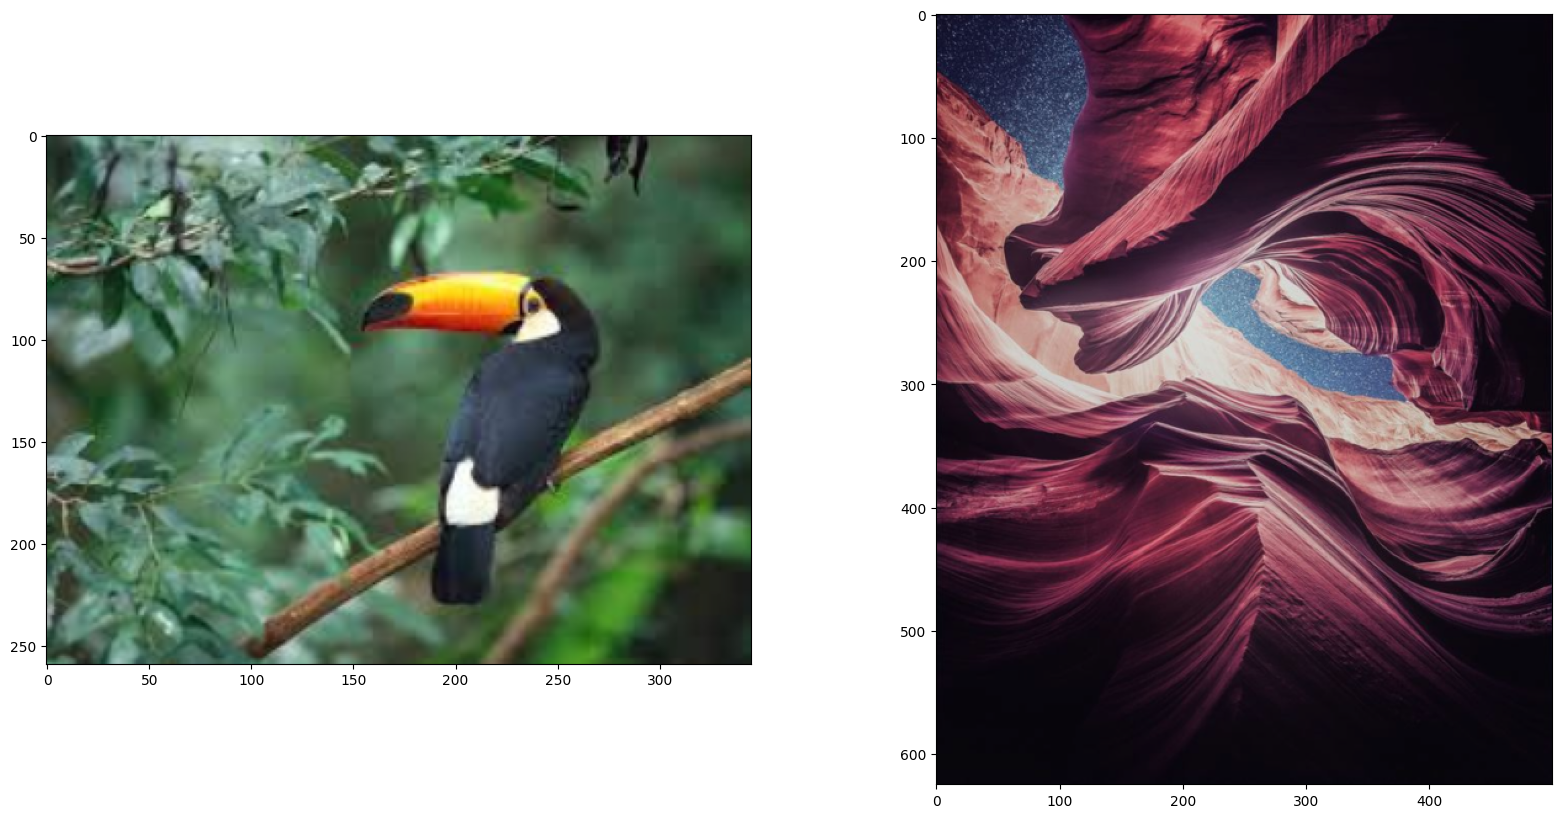

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.imshow(content_depr)
ax2.imshow(style_depr)

## 5. Get content,style features and create gram matrix

/content/Project-NST/representation.png

In [ ]:
def get_features(image, model):
  layers = {
      "0" : "conv1_1",
      "5" : "conv2_1",
      "10" : "conv3_1",
      "19" : "conv4_1",
      "21" : "conv4_2", # content feature
      "28" : "conv5_1"
  }

  x = image

  Features = {}

  for name, layer in model._modules.items():
    x = layer(x)

    if name in layers:
      Features[layers[name]] = x

  return Features

In [ ]:
content_features = get_features(content_prep, vgg)

In [ ]:
style_features = get_features(style_prep, vgg)

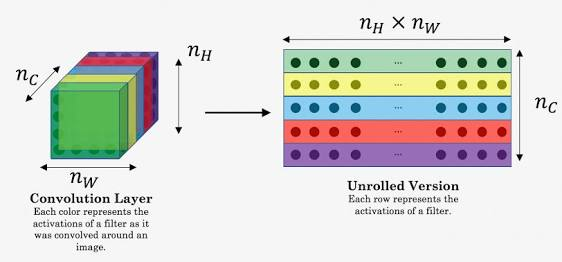

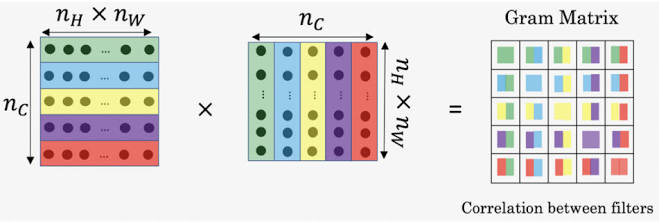

In [ ]:
def gram_matrix(tensor):
  # UNROLL
  # shape of tensor:
  batch_size, channel, height, width = tensor.size()
  tensor = tensor.view(channel, height * width)

  # GRAM MATRIX
  gram = torch.mm(tensor, tensor.t())
  return gram

In [ ]:
style_grams = {layer : gram_matrix(style_features[layer]) for layer in style_features}

## 6. Creating Style and Content loss function

In [ ]:
def content_loss(target_conv4_2, content_conv4_2):
  loss = torch.mean((target_conv4_2 - content_conv4_2)**2)
  return loss

In [ ]:
style_weights = {
    "conv1_1" : 1.0,
    "conv2_1" : 0.75,
    "conv3_1" : 0.2,
    "conv4_1" : 0.2,
    "conv5_1" : 0.2
}

In [ ]:
def style_loss(style_weights, target_features, style_grams):
  loss = 0

  for layer in style_weights:
    target_f = target_features[layer]
    target_gram = gram_matrix(target_f)
    style_gram = style_grams[layer]
    b, c, h, w = target_f.shape
    layer_loss = style_weights[layer] * torch.mean((target_gram - style_gram)**2)
    loss += layer_loss/(c*h*w)

  return loss

In [ ]:
target = content_prep.clone().requires_grad_(True).to(device)
target_f = get_features(target, vgg)

print("Content Loss:", content_loss(target_f["conv4_2"], content_features["conv4_2"]))
print("Style Loss:", style_loss(style_weights, target_f, style_grams))

Content Loss: tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
Style Loss: tensor(1765.7550, device='cuda:0', grad_fn=<AddBackward0>)


## 7. Training loop

In [ ]:
from torch import optim

In [ ]:
optimizer = optim.Adam([target], lr = 0.003)

alpha = 1
beta = 1e5
epochs = 3000
show_every = 500

In [ ]:
def total_loss(c_loss, s_loss, alpha, beta):
  loss = alpha * c_loss + beta * s_loss
  return loss

In [ ]:
results = []

for i in range(epochs):
  target_f = get_features(target, vgg)

  c_loss = content_loss(target_f["conv4_2"], content_features["conv4_2"])
  s_loss = style_loss(style_weights, target_f, style_grams)
  t_loss = total_loss(c_loss, s_loss, alpha, beta)

  optimizer.zero_grad()
  t_loss.backward()
  optimizer.step()

  if i % show_every == 0:
    print(f"Total Loss at Epoch: {i} : {t_loss}")
    results.append(deprocess(target.detach()))

Total Loss at Epoch: 0 : 175854512.0
Total Loss at Epoch: 500 : 26996286.0
Total Loss at Epoch: 1000 : 15210749.0
Total Loss at Epoch: 1500 : 11733827.0
Total Loss at Epoch: 2000 : 9677281.0
Total Loss at Epoch: 2500 : 8290399.0


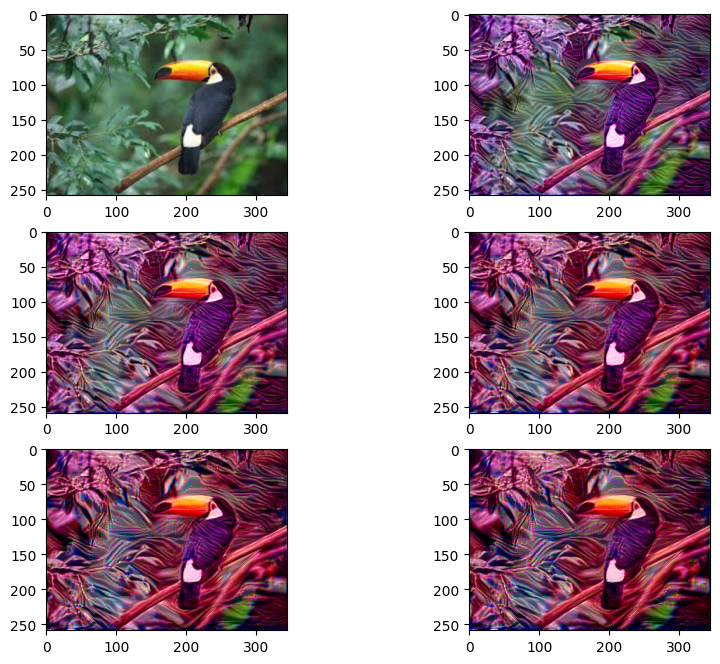

In [ ]:
plt.figure(figsize = (10, 8))

for i in range(len(results)):
  plt.subplot(3, 2, i+1)
  plt.imshow(results[i])

plt.show()

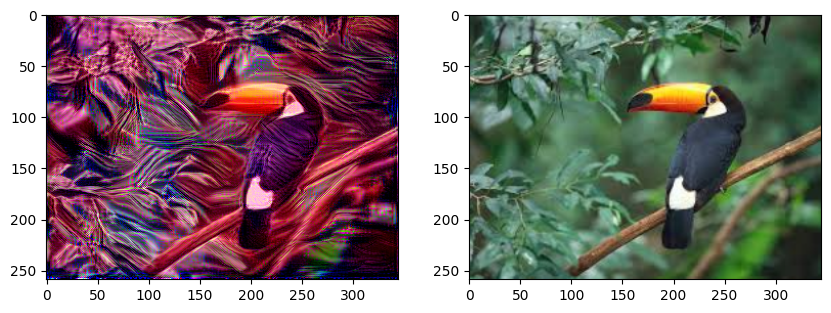

In [ ]:
target_copy = deprocess(target.detach())
content_copy = deprocess(content_prep)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax2.imshow(content_copy)
ax1.imshow(target_copy)